<a href="https://colab.research.google.com/github/sofiyaibrayeva/64061_sofiyaibrayeva/blob/main/AML_assignment_1_sofiya_ibrayeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *   Assignment 1_AML - Neural Network
# *   Date: 09/23/23
# *   Name: Sofiya Ibrayeva

---


# Purpose of the assignment:
The purpose of this assignment is to explore and extend your first Neural Network model.
This assignment aligns with the following module outcomes:
• MLO 1: Implement Keras and Tensorflow in a deep learning example by modifying an
existing neural network model to improve performance.
• MLO 2: Explain how different approaches affect the performance of the model.

---






Importing the IMDB movie review sentiment classification dataset from TensorFlow Keras. The code then loads the dataset into the variables (train_data, train_labels) and (test_data, test_labels), using the load_data() function. The num_words parameter specifies that only the top 10000 most frequent words in the dataset will be kept.

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

Decoding the first training data sequence in the IMDB movie review sentiment classification dataset.

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Vectorizing the dataset by creating an all-zero matrix of shape (len(sequences), dimension)

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

vectorizing the training and test data from the IMDB movie review sentiment classification dataset, and converts the labels to floating-point numbers.

## x_train and x_test are numpy arrays of vectorized training and test sequences.
##y_train and y_test are numpy arrays of training and test labels, converted to floating-point numbers.


In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Importing the necessary modules from TensorFlow's Keras API and creating a Sequential model

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the neural network model with specified configurations

In [8]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Splitting the training data into training and validation sets by extracting the first 10,000 samples for validation data and leaving the remaining samples for training data

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


Training the neural network model and capture the training history with batch size 512 and 20 epochs. Extracting keys from the training history dictionary

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 4s 84ms/step - loss: 0.5199 - accuracy: 0.7844 - val_loss: 0.3969 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3222 - accuracy: 0.8969 - val_loss: 0.3259 - val_accuracy: 0.8790
Epoch 3/20
30/30 [==============================] - 2s 50ms/step - loss: 0.2454 - accuracy: 0.9187 - val_loss: 0.3001 - val_accuracy: 0.8791
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1989 - accuracy: 0.9340 - val_loss: 0.2787 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1679 - accuracy: 0.9450 - val_loss: 0.3158 - val_accuracy: 0.8731
Epoch 6/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1444 - accuracy: 0.9545 - val_loss: 0.2918 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1236 - accuracy: 0.9623 - val_loss: 0.2993 - val_accuracy: 0.8809
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Ploting the training loss as red dots ("ro") and the validation loss as a solid red line

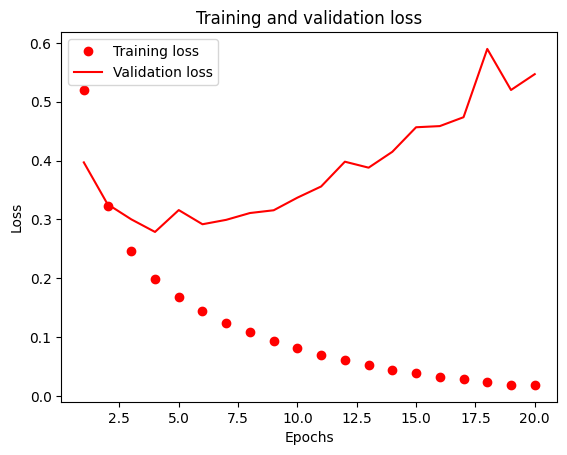

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Ploting the training accuracy as red dots ("ro") and the validation accuracy as a solid red line

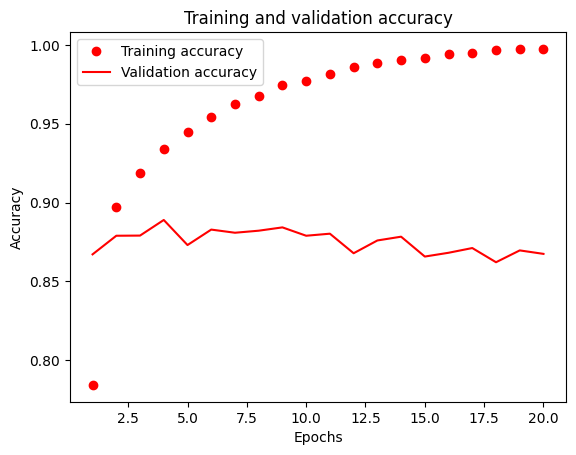

In [12]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Training the Model 1 Using epoches 4

In [13]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4704 - accuracy: 0.8076
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2792 - accuracy: 0.9012
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2170 - accuracy: 0.9218
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2821 - accuracy: 0.8867


In [14]:
results

[0.28214168548583984, 0.886680006980896]

Making predictions on a set of test data using a trained neural network model

In [15]:
model.predict(x_test)


782/782 [==============================] - 2s 2ms/step


array([[0.17342967],
       [0.9995491 ],
       [0.7961749 ],
       ...,
       [0.07795046],
       [0.06084055],
       [0.61306363]], dtype=float32)

Training the model 2 using epoches 5 by creating a Sequential neural network model and compiling the model with specified configurations

In [ ]:
# Install Keras
!pip install keras

# Import Keras
import keras
from keras import layers

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=5, batch_size=512)
results = model_2.evaluate(x_test, y_test)

In [ ]:
results

# Experimenting with a neural network architecture with three hidden layers.
### Model 1.1: Trained with 3 hidden layers

Defining a sequential model with 3 hidden layers, each with 16 neurons and ReLU activation, followed by an output layer for binary classification.

In [1]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

NameError: ignored

Ploting the graph between the training loss as red dots ("ro") and the validation loss as a solid red line

In [1]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: ignored

Ploting the graph between the training accuracy as red dots ("ro") and the validation accuracy as a solid red line

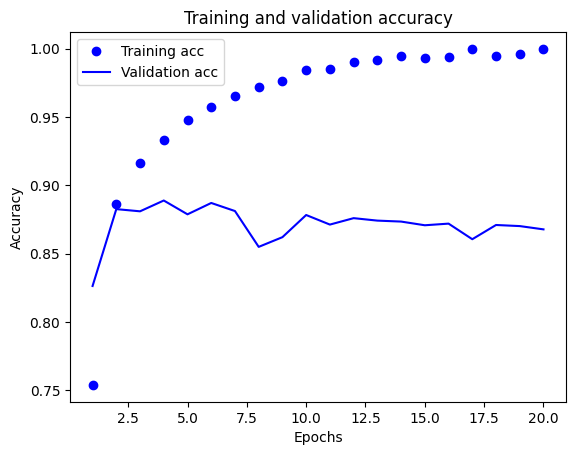

In [ ]:
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_11.fit(x_train, y_train, epochs=12, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

Epoch 1/12
49/49 [==============================] - 0s 9ms/step - loss: 0.2142 - accuracy: 0.9452
Epoch 2/12
49/49 [==============================] - 0s 10ms/step - loss: 0.1282 - accuracy: 0.9615
Epoch 3/12
49/49 [==============================] - 0s 9ms/step - loss: 0.0973 - accuracy: 0.9714
Epoch 4/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0742 - accuracy: 0.9787
Epoch 5/12
49/49 [==============================] - 0s 9ms/step - loss: 0.0582 - accuracy: 0.9836
Epoch 6/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0437 - accuracy: 0.9887
Epoch 7/12
49/49 [==============================] - 0s 9ms/step - loss: 0.0353 - accuracy: 0.9908
Epoch 8/12
49/49 [==============================] - 1s 10ms/step - loss: 0.0256 - accuracy: 0.9936
Epoch 9/12
49/49 [==============================] - 1s 10ms/step - loss: 0.0225 - accuracy: 0.9940
Epoch 10/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0169 - accuracy: 0.9954
Epoch 11/12
4

[0.2898900508880615, 0.8845599889755249]

#Exploring a simplified neural network architecture with one hidden layer.
## Model 1.2: Trained with 1 hidden layer

In [ ]:
model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict4 = history4.history
history_dict4.keys()

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.4957 - accuracy: 0.7944 - val_loss: 0.3800 - val_accuracy: 0.8737
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3183 - accuracy: 0.8987 - val_loss: 0.3215 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2553 - accuracy: 0.9171 - val_loss: 0.3062 - val_accuracy: 0.8793
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2144 - accuracy: 0.9327 - val_loss: 0.2915 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1877 - accuracy: 0.9412 - val_loss: 0.2769 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1656 - accuracy: 0.9483 - val_loss: 0.2755 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1506 - accuracy: 0.9541 - val_loss: 0.2788 - val_accuracy: 0.8876
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

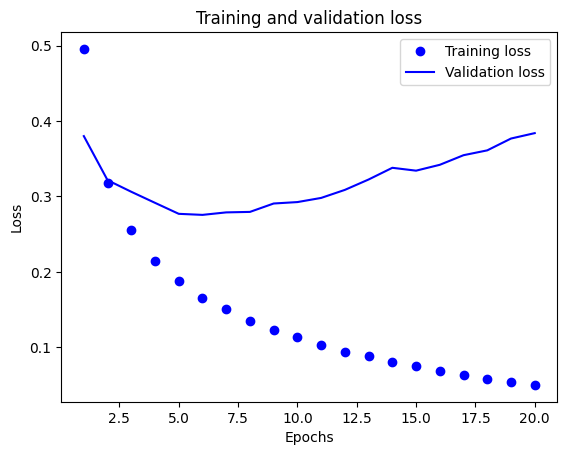

In [ ]:
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

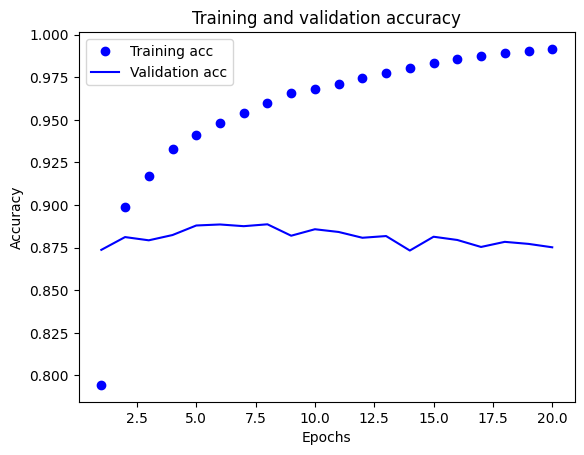

In [ ]:
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_12.fit(x_train, y_train, epochs=12, batch_size=512)
results_M12 = model.evaluate(x_test, y_test)
results_M12

Epoch 1/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1772 - accuracy: 0.9465
Epoch 2/12
49/49 [==============================] - 1s 10ms/step - loss: 0.1420 - accuracy: 0.9554
Epoch 3/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1230 - accuracy: 0.9610
Epoch 4/12
49/49 [==============================] - 0s 10ms/step - loss: 0.1098 - accuracy: 0.9662
Epoch 5/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0993 - accuracy: 0.9697
Epoch 6/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0914 - accuracy: 0.9719
Epoch 7/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0834 - accuracy: 0.9748
Epoch 8/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0762 - accuracy: 0.9784
Epoch 9/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0703 - accuracy: 0.9803
Epoch 10/12
49/49 [==============================] - 0s 10ms/step - loss: 0.0646 - accuracy: 0.9822
Epoch 11/

[0.2898900508880615, 0.8845599889755249]

# Experimenting with different hidden unit sizes in the neural network layers.
## Model 2.1: Training with 32 hidden units

Defining a sequential model with 32 hidden units in two hidden layers (ReLU activation), followed by an output layer for binary classification.

In [ ]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.5239 - accuracy: 0.7603 - val_loss: 0.3736 - val_accuracy: 0.8671
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3085 - accuracy: 0.8919 - val_loss: 0.3043 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2286 - accuracy: 0.9193 - val_loss: 0.2865 - val_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1858 - accuracy: 0.9360 - val_loss: 0.2808 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1555 - accuracy: 0.9466 - val_loss: 0.3435 - val_accuracy: 0.8640
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1344 - accuracy: 0.9544 - val_loss: 0.2927 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1140 - accuracy: 0.9615 - val_loss: 0.3412 - val_accuracy: 0.8727
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

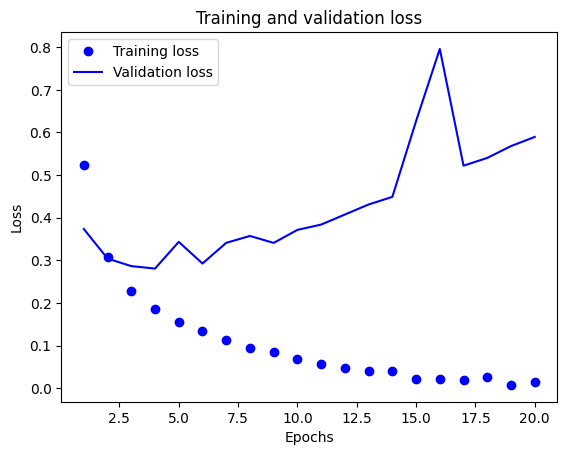

In [ ]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

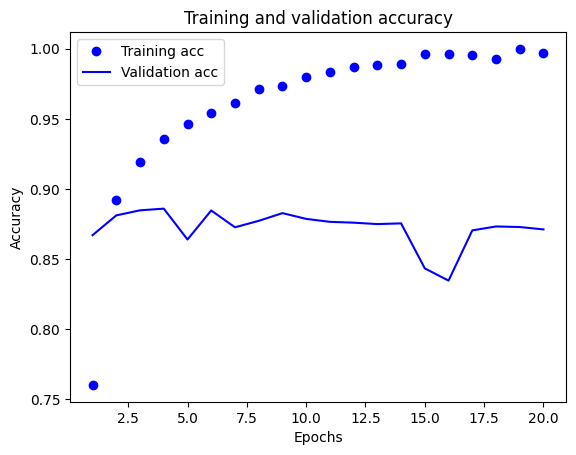

In [ ]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_21.fit(x_train, y_train, epochs=8, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1928 - accuracy: 0.9463
Epoch 2/8
49/49 [==============================] - 1s 13ms/step - loss: 0.1193 - accuracy: 0.9621
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0875 - accuracy: 0.9733
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0637 - accuracy: 0.9806
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0449 - accuracy: 0.9877
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0340 - accuracy: 0.9914
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0277 - accuracy: 0.9925
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.5948 - accuracy: 0.8631


[0.5948004126548767, 0.8631200194358826]

# Exploring the impact of increased hidden unit size in neural network layers.
## Model 2.2: Training with 64 hidden units

Defining a sequential model with 64 hidden units in two hidden layers (ReLU activation), followed by an output layer for binary classification.

In [ ]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5120 - accuracy: 0.7509 - val_loss: 0.3462 - val_accuracy: 0.8751
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2992 - accuracy: 0.8881 - val_loss: 0.2865 - val_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2287 - accuracy: 0.9139 - val_loss: 0.3069 - val_accuracy: 0.8784
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1757 - accuracy: 0.9355 - val_loss: 0.2764 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1485 - accuracy: 0.9444 - val_loss: 0.2944 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1151 - accuracy: 0.9610 - val_loss: 0.3115 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1012 - accuracy: 0.9636 - val_loss: 0.3518 - val_accuracy: 0.8816
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

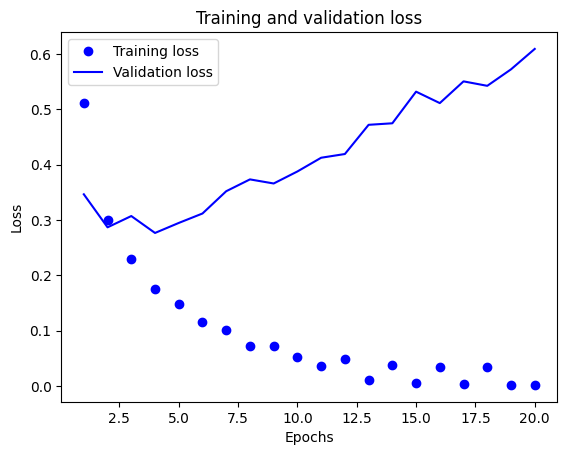

In [ ]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

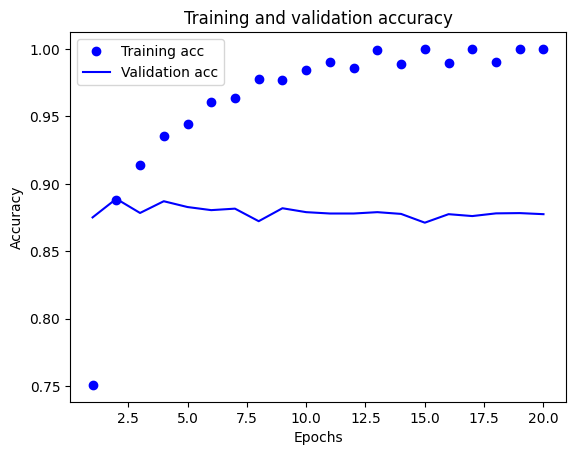

In [ ]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_22.fit(x_train, y_train, epochs=8, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

Epoch 1/8
49/49 [==============================] - 1s 16ms/step - loss: 0.2100 - accuracy: 0.9443
Epoch 2/8
49/49 [==============================] - 1s 17ms/step - loss: 0.1002 - accuracy: 0.9679
Epoch 3/8
49/49 [==============================] - 1s 17ms/step - loss: 0.0584 - accuracy: 0.9828
Epoch 4/8
49/49 [==============================] - 1s 19ms/step - loss: 0.0413 - accuracy: 0.9887
Epoch 5/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0201 - accuracy: 0.9958
Epoch 6/8
49/49 [==============================] - 1s 19ms/step - loss: 0.0144 - accuracy: 0.9969
Epoch 7/8
49/49 [==============================] - 1s 22ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.5529 - accuracy: 0.8645


[0.5529045462608337, 0.8644800186157227]

# Exploring the effect of using even larger hidden units in neural network layers.
## Model 2.3: Training with 128 hidden units

Defining a sequential model with 128 hidden units in two hidden layers (ReLU activation), followed by an output layer for binary classification.

In [ ]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5176 - accuracy: 0.7479 - val_loss: 0.4017 - val_accuracy: 0.8225
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2895 - accuracy: 0.8884 - val_loss: 0.3102 - val_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2326 - accuracy: 0.9073 - val_loss: 0.2768 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1783 - accuracy: 0.9314 - val_loss: 0.3467 - val_accuracy: 0.8613
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1402 - accuracy: 0.9502 - val_loss: 0.3721 - val_accuracy: 0.8661
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1203 - accuracy: 0.9551 - val_loss: 0.3038 - val_accuracy: 0.8828
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0773 - accuracy: 0.9742 - val_loss: 0.4086 - val_accuracy: 0.8697
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

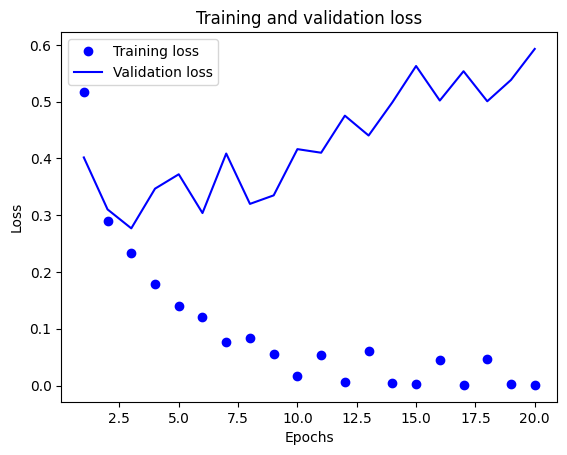

In [ ]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

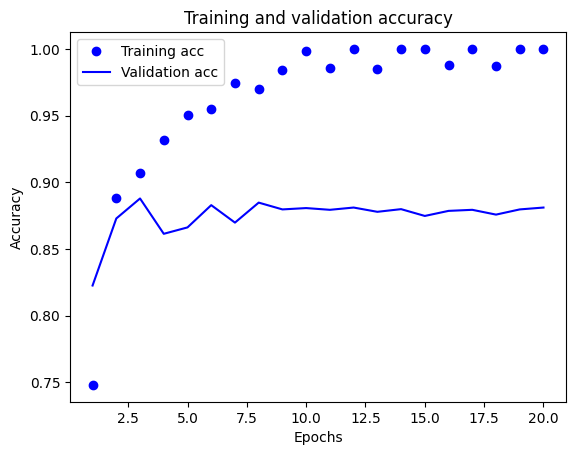

In [ ]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_23.fit(x_train, y_train, epochs=8, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

Epoch 1/8
49/49 [==============================] - 1s 23ms/step - loss: 0.1689 - accuracy: 0.9468
Epoch 2/8
49/49 [==============================] - 1s 23ms/step - loss: 0.0842 - accuracy: 0.9727
Epoch 3/8
49/49 [==============================] - 1s 22ms/step - loss: 0.0467 - accuracy: 0.9855
Epoch 4/8
49/49 [==============================] - 1s 24ms/step - loss: 0.0248 - accuracy: 0.9929
Epoch 5/8
49/49 [==============================] - 1s 23ms/step - loss: 0.0253 - accuracy: 0.9926
Epoch 6/8
49/49 [==============================] - 1s 23ms/step - loss: 0.0039 - accuracy: 0.9994
Epoch 7/8
49/49 [==============================] - 1s 22ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.5150 - accuracy: 0.8722


[0.515015184879303, 0.8722000122070312]

# Experimenting with an alternative loss function - Mean Squared Error (MSE).
## Model 3: Training with MSE loss

Defining a sequential model with two hidden layers (16 neurons each, ReLU activation), followed by an output layer for binary classification (sigmoid activation).

In [ ]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.1953 - accuracy: 0.7591 - val_loss: 0.1470 - val_accuracy: 0.8546
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1189 - accuracy: 0.8802 - val_loss: 0.1106 - val_accuracy: 0.8719
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0876 - accuracy: 0.9056 - val_loss: 0.0942 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0700 - accuracy: 0.9244 - val_loss: 0.0870 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0597 - accuracy: 0.9342 - val_loss: 0.0851 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0508 - accuracy: 0.9452 - val_loss: 0.0829 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0453 - accuracy: 0.9517 - val_loss: 0.0856 - val_accuracy: 0.8816
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

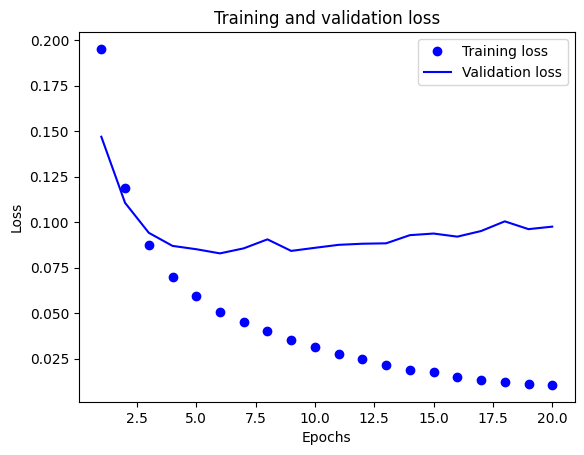

In [ ]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

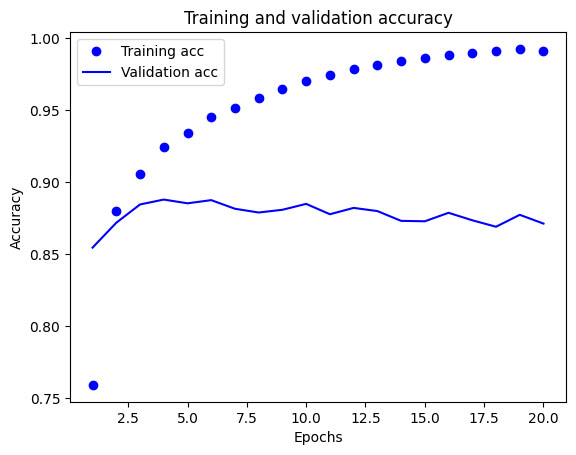

In [ ]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0441 - accuracy: 0.9472
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0349 - accuracy: 0.9607
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0294 - accuracy: 0.9686
Epoch 4/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0263 - accuracy: 0.9728
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0229 - accuracy: 0.9771
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0207 - accuracy: 0.9805
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0189 - accuracy: 0.9823
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1065 - accuracy: 0.8683


[0.106473907828331, 0.8683199882507324]

# Exploring the use of the Tanh activation function, a historically popular choice.
## Model 4: Training with Tanh Activation

Defining a sequential model with two hidden layers (16 neurons each) using the Tanh activation function, followed by an output layer for binary classification (sigmoid activation).

In [ ]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5076 - accuracy: 0.7897 - val_loss: 0.3808 - val_accuracy: 0.8667
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3025 - accuracy: 0.8996 - val_loss: 0.2986 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2242 - accuracy: 0.9226 - val_loss: 0.2834 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1716 - accuracy: 0.9429 - val_loss: 0.2729 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1400 - accuracy: 0.9525 - val_loss: 0.2994 - val_accuracy: 0.8788
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1105 - accuracy: 0.9633 - val_loss: 0.3113 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0900 - accuracy: 0.9714 - val_loss: 0.3393 - val_accuracy: 0.8786
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

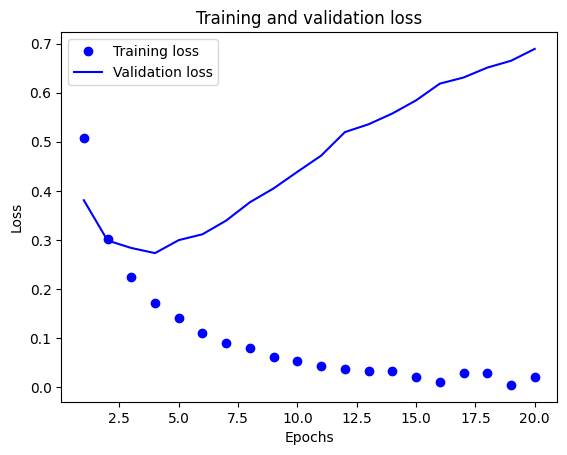

In [ ]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

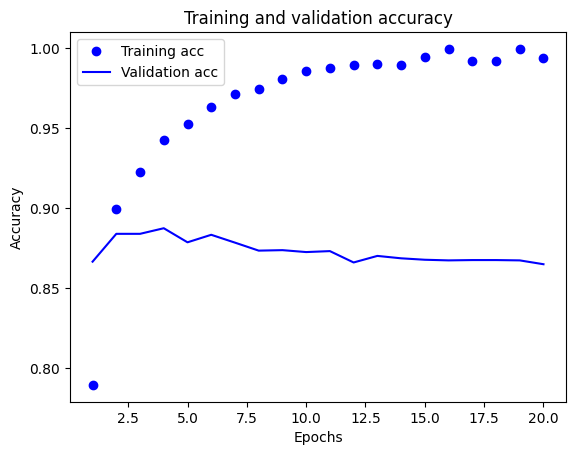

In [ ]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 0s 9ms/step - loss: 0.2603 - accuracy: 0.9448
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1521 - accuracy: 0.9588
Epoch 3/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1173 - accuracy: 0.9653
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1022 - accuracy: 0.9686
Epoch 5/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0867 - accuracy: 0.9729
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0766 - accuracy: 0.9764
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0710 - accuracy: 0.9777
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.5681 - accuracy: 0.8554


[0.5680978298187256, 0.8554400205612183]

# Implementing regularization techniques to enhance model performance on validation data.
## Model 5.1: L2 Regularization (Weight Decay)

Defining a sequential model with two hidden layers (16 neurons each) using ReLU activation, and applying L2 regularization to the kernel (weight) matrices with a regularization strength of 0.001.

In [ ]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5900 - accuracy: 0.7741 - val_loss: 0.4833 - val_accuracy: 0.8378
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3995 - accuracy: 0.8861 - val_loss: 0.3877 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3204 - accuracy: 0.9107 - val_loss: 0.3473 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2777 - accuracy: 0.9237 - val_loss: 0.3373 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2521 - accuracy: 0.9324 - val_loss: 0.3374 - val_accuracy: 0.8845
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2335 - accuracy: 0.9388 - val_loss: 0.3341 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2194 - accuracy: 0.9469 - val_loss: 0.3419 - val_accuracy: 0.8845
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

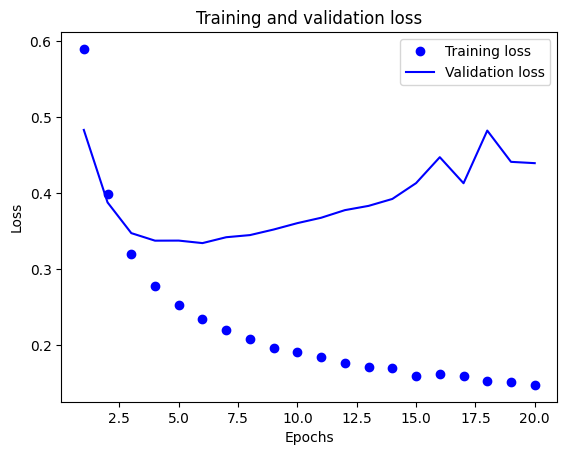

In [ ]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

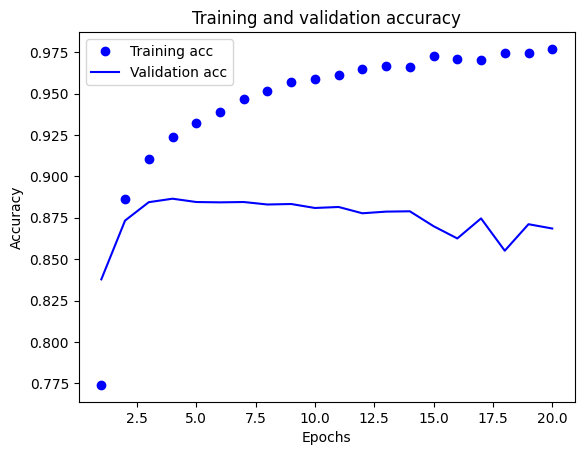

In [ ]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_regularisation.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

Epoch 1/8
49/49 [==============================] - 1s 12ms/step - loss: 0.2582 - accuracy: 0.9344
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2207 - accuracy: 0.9422
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.2069 - accuracy: 0.9461
Epoch 4/8
49/49 [==============================] - 1s 15ms/step - loss: 0.2000 - accuracy: 0.9509
Epoch 5/8
49/49 [==============================] - 1s 13ms/step - loss: 0.1938 - accuracy: 0.9519
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1897 - accuracy: 0.9540
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1908 - accuracy: 0.9523
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4333 - accuracy: 0.8662


[0.4332844913005829, 0.8662400245666504]

# Implementing dropout regularization to enhance model generalization and robustness.
## Model 5.2: Dropout Layers (Dropout Rate of 0.5)

Defining a sequential model with two hidden layers (16 neurons each) using ReLU activation, and inserting dropout layers with a dropout rate of 0.5 after each hidden layer.

In [ ]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.6505 - accuracy: 0.6199 - val_loss: 0.5602 - val_accuracy: 0.8245
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5536 - accuracy: 0.7393 - val_loss: 0.4604 - val_accuracy: 0.8646
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4718 - accuracy: 0.7991 - val_loss: 0.3802 - val_accuracy: 0.8757
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3976 - accuracy: 0.8443 - val_loss: 0.3306 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3470 - accuracy: 0.8677 - val_loss: 0.3000 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3091 - accuracy: 0.8863 - val_loss: 0.2843 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2722 - accuracy: 0.9012 - val_loss: 0.2773 - val_accuracy: 0.8879
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

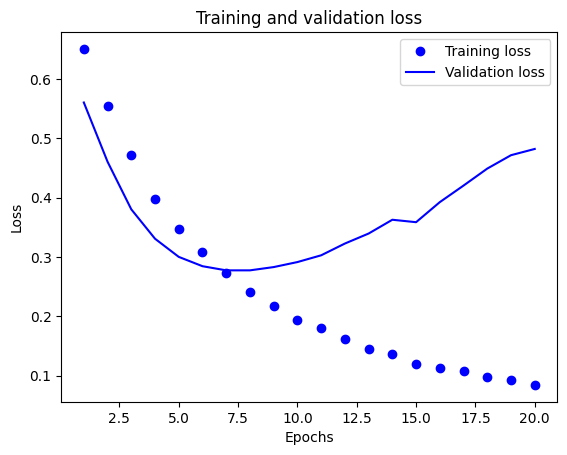

In [ ]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


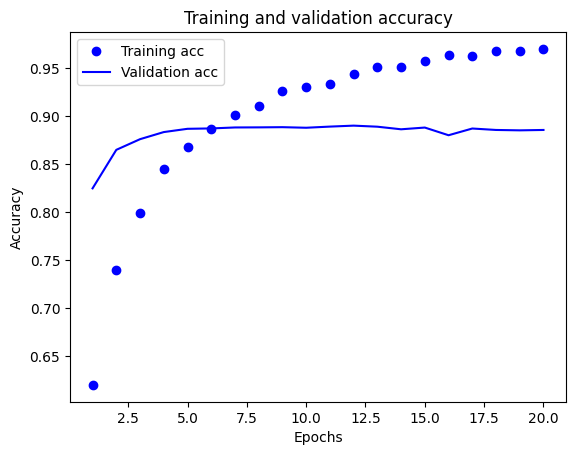

In [ ]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout


Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.2470 - accuracy: 0.9230
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2035 - accuracy: 0.9336
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1808 - accuracy: 0.9399
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1739 - accuracy: 0.9402
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1569 - accuracy: 0.9444
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1451 - accuracy: 0.9467
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1389 - accuracy: 0.9490
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4612 - accuracy: 0.8760


[0.46121644973754883, 0.8759599924087524]

# Training the model with Hyper-tuned Parameters.
## Model Hyper: Tuned Architecture with Regularization and Dropout

Defining a sequential model with multiple hidden layers, incorporating regularization and dropout. Hyper-tuned parameters include hidden layer sizes, L2 regularization, and dropout rates.

In [ ]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 3s 47ms/step - loss: 0.2548 - accuracy: 0.5573 - val_loss: 0.2328 - val_accuracy: 0.7688
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2191 - accuracy: 0.6849 - val_loss: 0.1730 - val_accuracy: 0.8513
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1777 - accuracy: 0.7804 - val_loss: 0.1370 - val_accuracy: 0.8622
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1457 - accuracy: 0.8367 - val_loss: 0.1084 - val_accuracy: 0.8781
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1234 - accuracy: 0.8684 - val_loss: 0.1006 - val_accuracy: 0.8811
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1051 - accuracy: 0.8945 - val_loss: 0.1024 - val_accuracy: 0.8757
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0929 - accuracy: 0.9099 - val_loss: 0.1022 - val_accuracy: 0.8822
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

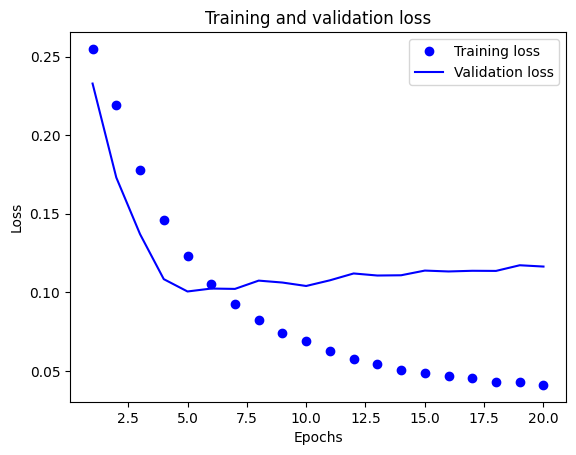

In [ ]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

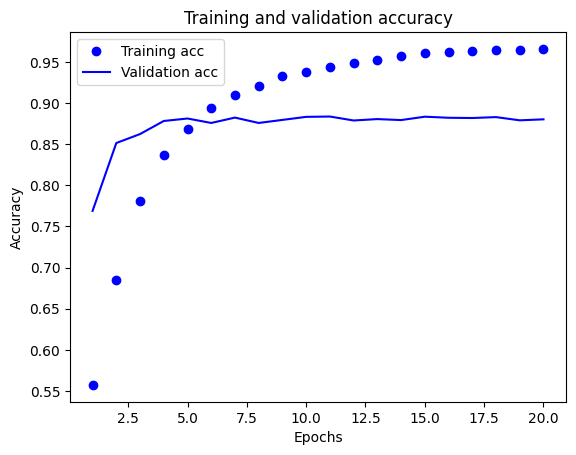

In [ ]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper


Epoch 1/8
49/49 [==============================] - 1s 13ms/step - loss: 0.0734 - accuracy: 0.9270
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0675 - accuracy: 0.9332
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0634 - accuracy: 0.9384
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0595 - accuracy: 0.9427
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0564 - accuracy: 0.9474
Epoch 6/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0544 - accuracy: 0.9492
Epoch 7/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0527 - accuracy: 0.9513
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1222 - accuracy: 0.8687


[0.12216336280107498, 0.8686800003051758]

##Summarizing the performance metrics (loss and accuracy) for multiple models.

In [ ]:
All_Loss= np.array([results_M11[0],results_M12[0],results_M21[0],results_M22[0],results_M23[0],results_MSE[0],results_tanh[0],results_regularisation[0],results_Dropout[0],results_Hyper[0]])*100
All_Loss
All_Accuracy= np.array([results_M11[1],results_M12[1],results_M21[1],results_M22[1],results_M23[1],results_MSE[1],results_tanh[1],results_regularisation[1],results_Dropout[1],results_Hyper[1]])*100
All_Accuracy
Labels=['Model_11','Model_12','Model_21','Model_22','Model_23','Model_MSE','model_tanh','model_regularisation','Model_Dropout','Model_Hyper']
plt.clf()

<Figure size 640x480 with 0 Axes>

##Comparing the performance of multiple models by creating a scatter plot with loss values on the x-axis and accuracy values on the y-axis.


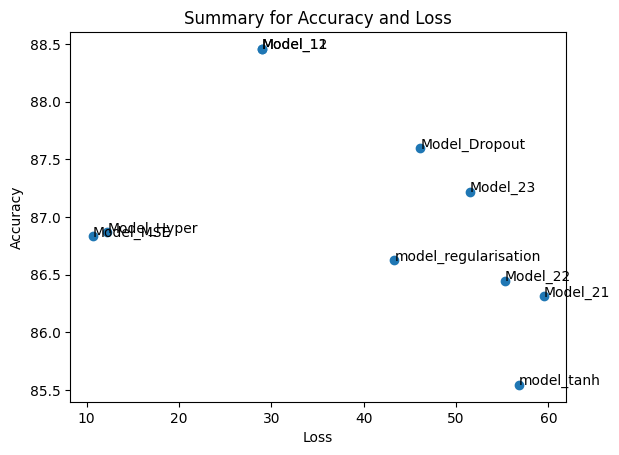

In [ ]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.show()

#SUMMARY
* Model_11 (3 layers): This model has three hidden layers.
* Model_12 (1 layer): This model has only one hidden layer.
* Model_21 (32 units): Hidden layers have 32 units each.
* Model_22 (64 units): Hidden layers have 64 units each.
* Model_23 (128 units): Hidden layers have 128 units each.
* Model_MSE (MSE loss): Utilizes Mean Squared Error (MSE) loss function.
* Model_tanh (tanh activation): Uses the tanh activation function.
* Model_Regularisation (L2 regularization): Applies L2 regularization with a coefficient of 0.0001 to all hidden layers.
* Model_Dropout (dropout): Implements dropout with a rate of 0.5 after each hidden layer.
* Model_Hyper (hyper-tuned): Combines various changes in one.

#Model Compilation:
The binary cross-entropy loss function is well-suited for classification models, quantifying the alignment of predicted probabilities (ranging from 0 to 1) with actual labels. In contrast, mean squared error (MSE) is typically used in regression tasks, measuring the closeness of a regression line to data points. Squaring differences ensures that negative and positive discrepancies are accounted for.

#Graphical Analysis:

* The "Model_Hyper" achieved the highest accuracy and the lowest loss among all models.
* MSE loss resulted in minimal loss when compared to other models (excluding the hyper-tuned model).
* Increasing the number of units from 16 to 32, 64, and 128 resulted in marginal accuracy improvements and steadily decreasing loss.
* Increasing the number of hidden layers from 1 to 3 had no significant impact on loss or accuracy.
* The tanh activation function led to lower accuracy due to vanishing gradient issues.
* Surprisingly, regularization increased loss and decreased accuracy, contrary to the expected outcome, as it is typically used to mitigate overfitting and improve generalization.
* Dropout regularization reduced loss but had a relatively minor impact on accuracy.

##These findings provide valuable insights into the performance and behavior of different model configurations and techniques, helping to guide future model selection and development based on the specific requirements of your task.






